<a href="https://colab.research.google.com/github/ArthurCBx/Applied_Social_Network_Analysis/blob/main/module%202/Network_Connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triadic Closure
**Triadic closure:** The tendency for people who share connections in a social network to become connected.
  - How can we measure the prevalence of triadic closure in a network.

## Local Clustering Coefficient
**Local clustering coefficient of a node:** Fraction of pairs of the node's friends that are friends with each other

-  $ \frac{N\,of pairs of Cs friends who are friends}{N of pairs of Cs friends} $
- The denominator will be $\frac{d_c(d_c-1)}{2}$

- In NetworkX:
```python
G = nx.Graph()
G.add_edges_from([('A','K'), ('A','B'), ('A','C'), ('B','C'), ('B','K'), ('C','E'), ('C','F'), ('D','E'), ('E','F'), ('E','H'), ('F','G'), ('I','J')])
nx.clustering(G,'F')
>>>0.333
nx.clustering(G,'J')
>>>0
```

## Global Clustering Coefficient
- Approach 1: Average local clustering coefficient over all nodes in the graph;
- Approach 2: Measuring clustering on the whole network:
  - Percentage of "open triads" that are triangles in a network;
  - $Transitivity=\frac{3*Number of closed triads}{Number of open triads} $
  - Transitivity: Ratio of number of triangles and number of "open triads" in a network.

## Transitivity vs Average Clustering Coefficient
- Both measure the tendency for edges to form triangles;
- Transitivity weights nodes with large degree higher.

# Distance
## Questions to be answer
- How "far" is node 1 from node 2 ?
- Are nodes far away or close to each other in this network?
- Which nodes are "closest" and "farthest" to other nodes ?

## Paths
**Path:** A sequence of nodes connected by an edge

**Path length:** Number of steps it contains from begginig to end.

**Distance between two nodes:** The length of the shortest path between them
```python
nx.shortest_path(G,'A','H')
```
- Finding the distance from one node to all the other networks:
  - **Breadth-first search:** a systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discovering" nodes in layers.
  ```python
  # To discover node's distance from A in a tree format
  T= nx.bfs_tree(G,'A')

  # To discover node's distance from A
  nx.shortest_path_length(G,'A')
  ```

## Distance Measures
- How to caracterize the distance between all pairs of nodes in a graph?
- **Average distance** between every pair of nodes.
```python
nx.average_shortest_path_length(G)
```
- **Diameter:** maximum distance between any pair of nodes. (`nx.diameter(G)`)
- **Eccentricity:** is the largest distance between n and all other nodes.
- **radius** is the minimum eccentricity.
- **Periphery** is the set of nodes that have eccentricity equal to the diameter.
- **center** is the set of nodes that have eccentricity equal to the radius



# Connected Components
## Connected Graphs
- An undirected graph is **connected** if, for every pair nodes, there's a path between them
`nx.is_connected(G)`

## Graph Components
**Connected component:** a subset of nodes such as:
1. Every node in the subset has a path to every other node;
2. No other node has a path to any node in the subset.
- `nx.number_connected_components(G)`

## Connectivity in Directed Graphs
- A directed graph is **strongly connect** if, for every pair of nodes u and v, there's a directed path from u to v and a directed path from v to u.
  - `nx.is_strongly_connected(G)`.
- A graph is **weakly connected** if replacing all directed edges with undirected edges produces a connected undirected graph
  - `nx.is_weakly_connected(G)`

- **Strongly connected component:** A subset of nodes such as:
1. Every node in the subset has a **direct** path to every other node;
2. No other node has a **direct** path to and from every node in the subset.
  - `nx.strongly_connected_components(G)`

- **Weakly connected component:** The connected components of the graph after replacing all directed edges with undirected edges produces a connected undirected graph.
  - `nx.weakly_connected_components(G)`

# Network Robustness
- **Network robustness:** the ability of a network to maintain its general structural propertes when it faces failures or attacks.
- **Types of attacks:** removal of nodes or edges;
- **Structural properties:** connectivity;
- Examples: airport closures, internet router failure, power line failures.

## Disconnecting a Graph
- What is the smallest number of nodes that can be removed from this graph in order to disconnect it.
  - Number: `nx.node_connectivity(G)`
  - What node: `nx.minimum_node_cut(G)`

- What is the smallest number of edges that can be removed from this graph in order to disconnect it?
  - Number: `nx.edge_connectivity(G)`
  - Node pair: `nx.minimum_edge_cut(G)`

## Simple Paths
- What options does G have to deliver a message (directed graph) from 'G' to 'L' ?
  - nx.all_simple_paths(G, 'G', 'L')

## Node Connectivity
- If we wanted to block the message from 'G' to 'L' by removing nodes from the network, how many nodes would we need to remove?
  - Number: `nx.node_connectivity(G,'G','L')`
  - Which nodes: `nx.minimum_node_cut(G,'G','L')`

## Edge Connectivity
- If we wanted to block the message from 'G' to 'L' by removing edges from the network, how many edges would we need to remove?
  - Number: `nx.edge_connectivity(G,'G','L')`
  - Which edges: `nx.minimum_edge_cut(G,'G','L')`

# TA Demonstration

## Visualizing Networks

In [1]:
!git clone -q https://github.com/ArthurCBx/Applied_Social_Network_Analysis.git

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

G = pickle.load(open('Applied_Social_Network_Analysis/module 2/major_us_cities', 'rb'))

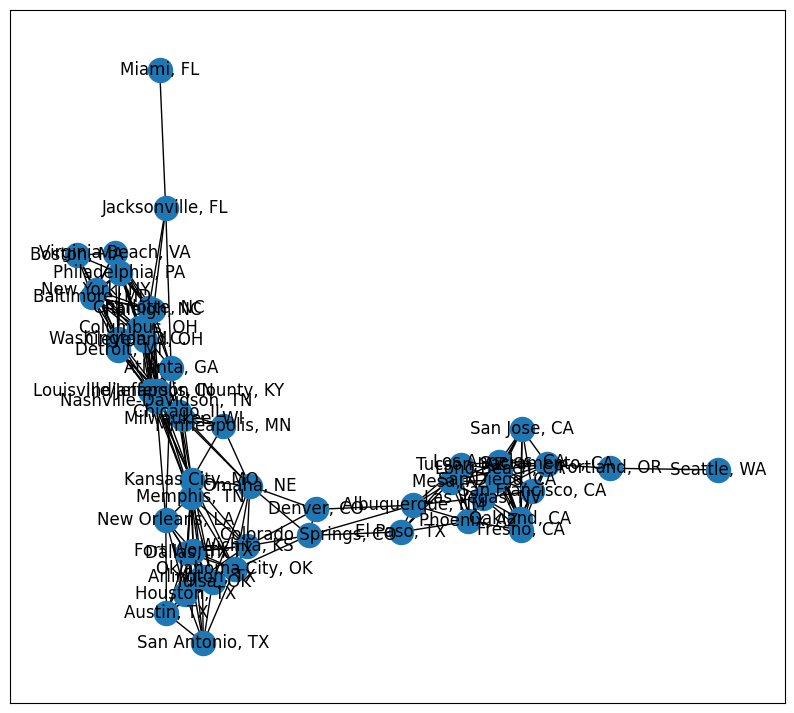

In [3]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [4]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

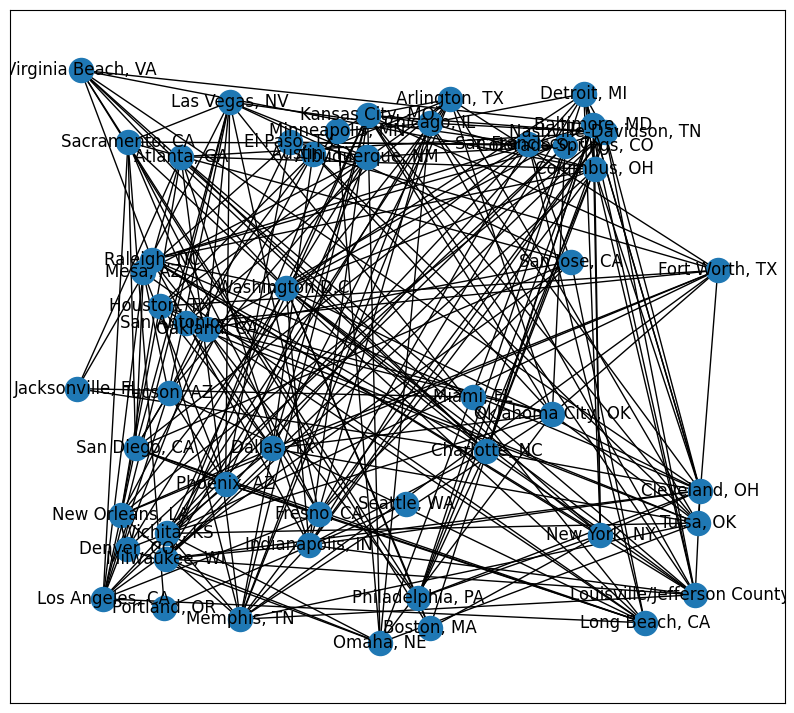

In [5]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

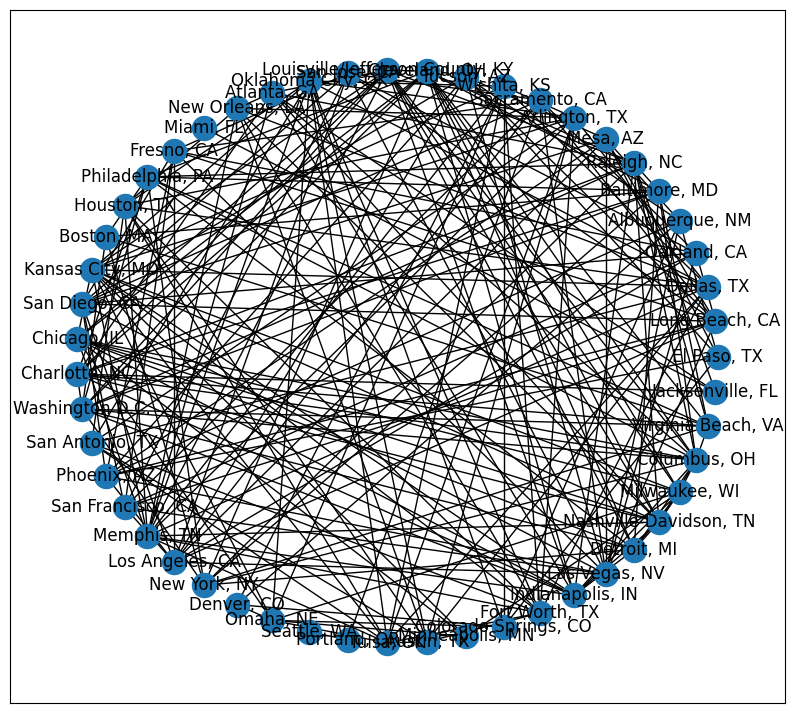

In [6]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

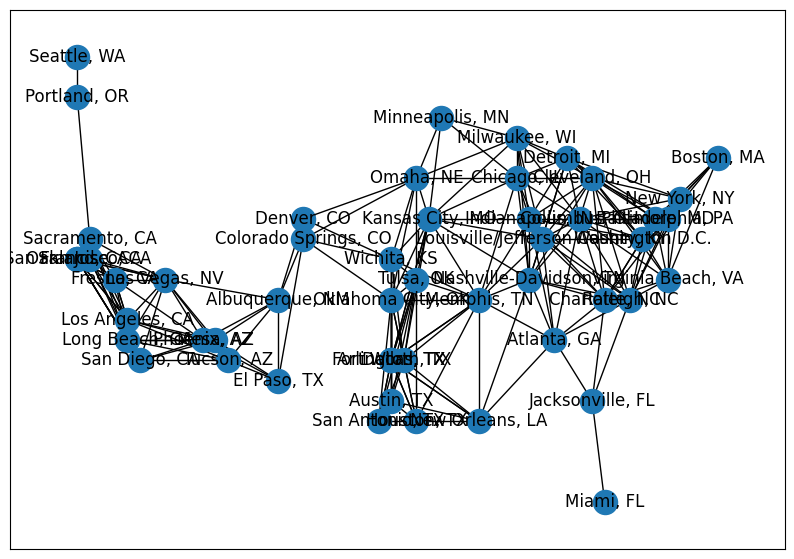

In [7]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

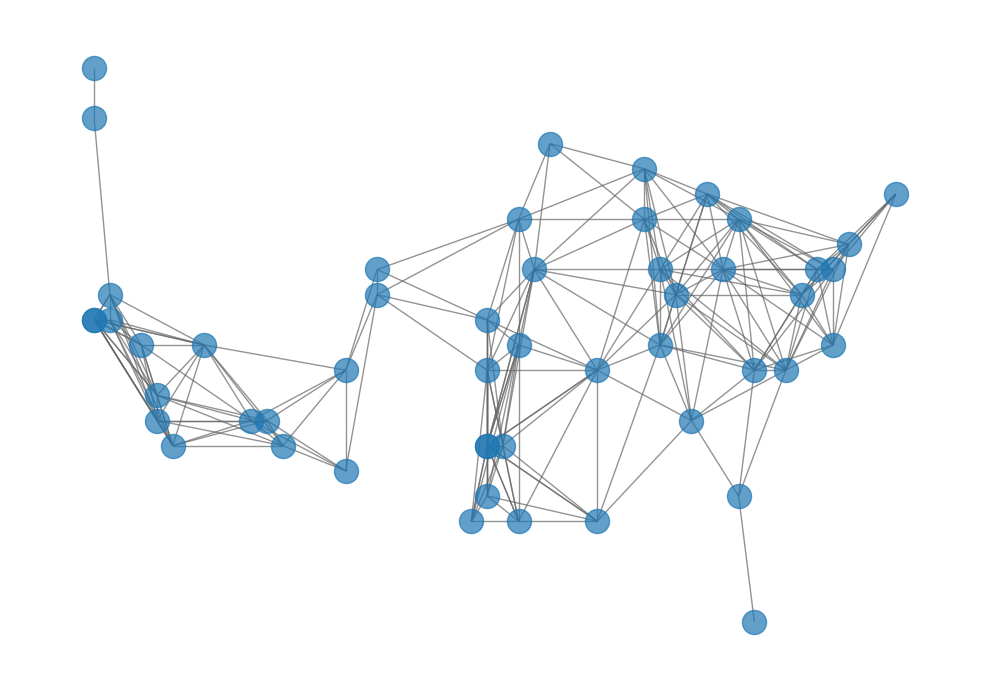

In [8]:
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos,alpha=0.7, with_labels=False, edge_color='.4')
plt.axis('off')
plt.tight_layout();

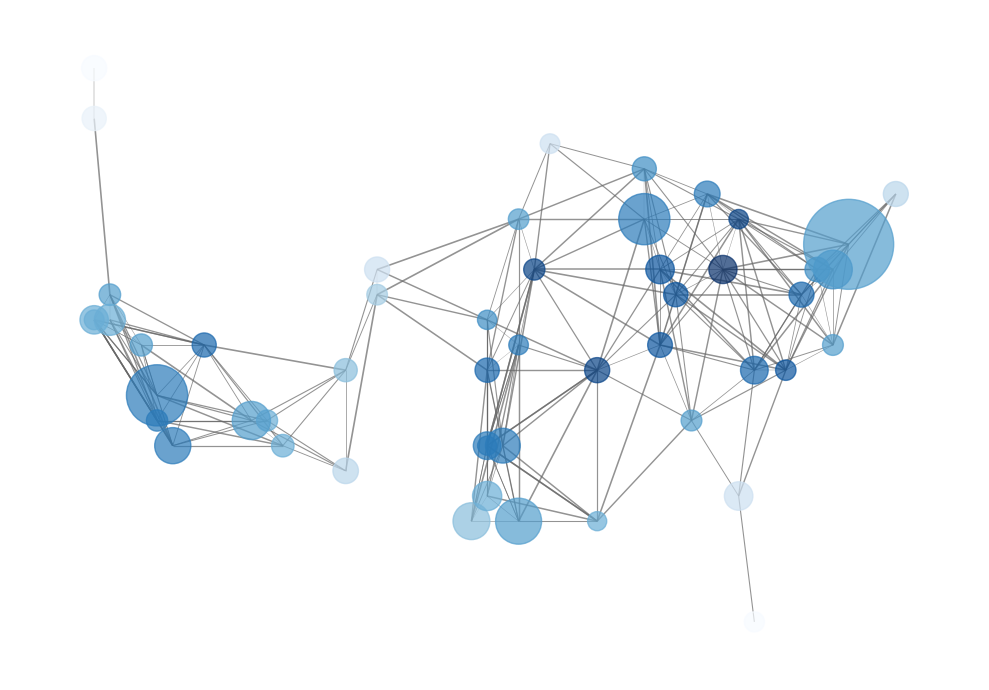

In [9]:
plt.figure(figsize=(10,7))
node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size,
                 node_color=node_color, alpha=0.7, with_labels=False,
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

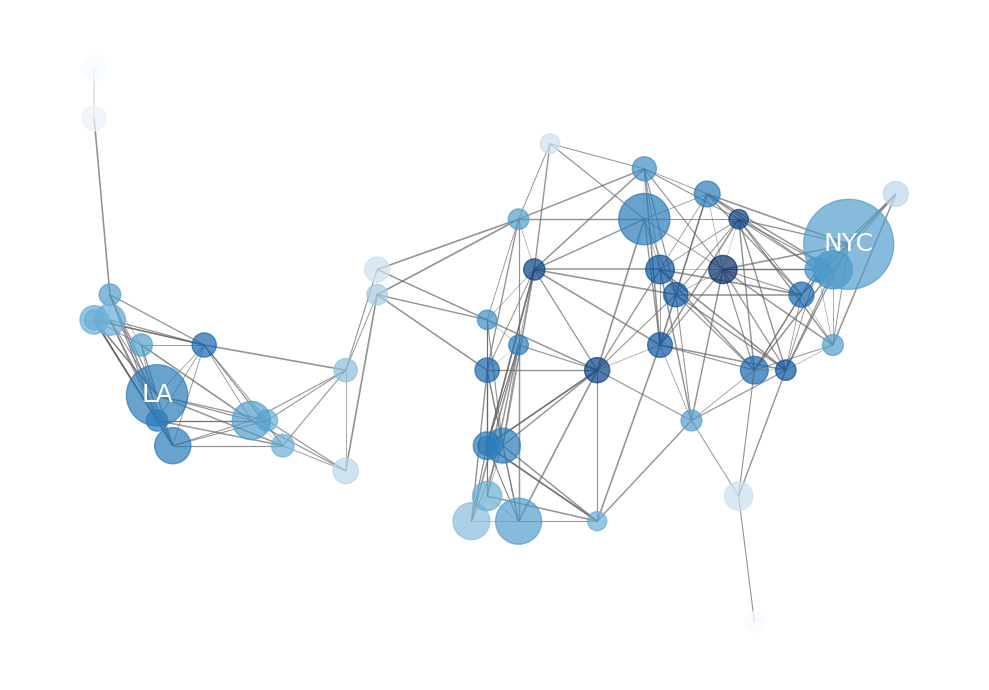

In [10]:
plt.figure(figsize=(10,7))
node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size,
                 node_color=node_color, alpha=0.7, with_labels=False,
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight'] >770]
nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')
plt.axis('off')
plt.tight_layout();

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company.
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient. We will also store the timestamp of each email.

In [11]:
import networkx as nx

!head 'Applied_Social_Network_Analysis/module 2/email_network.txt'

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


### Question 1

Using networkx, load up the directed multigraph from `assets/email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [49]:
import numpy as np
import pandas as pd
def answer_one():
  df = pd.read_csv('Applied_Social_Network_Analysis/module 2/email_network.txt',sep='\t')

  # Create an empty MultiDiGraph instance
  G = nx.MultiDiGraph()

  # Prepare the edges as a list of tuples (sender, recipient, {'time': timestamp})
  edges_to_add = [
      (str(row['#Sender']), str(row['Recipient']), {'time': row['time']})
      for index, row in df.iterrows()
  ]

  # Add all edges to the graph
  G.add_edges_from(edges_to_add)
  return G

### Question 2

How many employees are represented in the network?

How many `sender`->`recipient` pairs of employees are there in the network such that `sender` sent at least one email to `recipient`? Note that even if a `sender` sent multiple messages to a `recipient`, they should only be counted once. You should **not** exclude cases where an employee sent emails to themselves from this [email] count.

*This function should return a tuple with two integers (#employees, # `sender`->`recipient` pairs).*

In [50]:
def answer_two():
  import pandas as pd
  G = answer_one()
  df = pd.DataFrame(G.edges(data=True), columns=['Sender','Recipient','time'])

  senders = set(df['Sender'])
  recipient = set(df['Recipient'])
  total_employees = len(senders|recipient)

  pairs = len(set([(row['Sender'], row['Recipient']) for _, row in df.iterrows()]))

  return (total_employees, pairs)
answer_two()

(167, 5784)

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the reciever, but not viceversa.

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways.

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [51]:
import itertools
import networkx as nx

def answer_three():
  G = answer_one()

  # Part 1: Directed graph - check for strong connectivity
  part1 = nx.is_strongly_connected(G)

  # Part 2: Undirected graph - check for connectivity
  G_undirected = G.to_undirected()
  part2 = nx.is_connected(G_undirected)

  return (part1, part2)

answer_three()

(False, True)

### Question 4

How many nodes are in the largest weakly connected component of the graph?

*This function should return an int.*

In [52]:
def answer_four():
  G = answer_one()

  components = nx.weakly_connected_components(G)
  largest_component = max(components, key=len)

  return len(largest_component)

answer_four()

167

### Question 5

How many nodes are in the largest strongly connected component?

*This function should return an int*

In [53]:
def answer_five():
  G = answer_one()

  directed_components = nx.strongly_connected_components(G)
  largest_component = max(directed_components,key=len)

  return len(largest_component)

### Question 6

Using the NetworkX functions `strongly_connected_components` and `subgraph`, find the subgraph of nodes in the largest strongly connected component.
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [54]:
def answer_six():
  G = answer_one()
  strongly_connected = nx.strongly_connected_components(G)
  G_sc = nx.subgraph(G, max(strongly_connected, key=len))
  return G_sc
answer_six()

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [55]:
def answer_seven():
  G_sc = answer_six()
  return nx.average_shortest_path_length(G_sc)

answer_seven()

1.6461587301587302

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [56]:
def answer_eight():
  G_sc = answer_six()
  return nx.distance_measures.diameter(G_sc)

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [57]:
def answer_nine():
  G_sc = answer_six()
  key_value_pair = nx.eccentricity(G_sc).items()
  diameter = nx.diameter(G_sc)
  return set([key for key,value in key_value_pair if value==diameter])
answer_nine()

{'129', '134', '97'}

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [58]:
def answer_ten():
  G_sc = answer_six()
  radius = nx.radius(G_sc)
  key_value_pair = nx.eccentricity(G_sc).items()
  return set([key for key, value in key_value_pair if value==radius])
answer_ten()


{'38'}

### Question 11

Which node in G_sc has the most shortest paths to other nodes whose distance equal the diameter of G_sc?


For the node with the most such shortest paths, how many of these paths are there?


*This function should return a tuple (name of node, number of paths).*

In [146]:
def answer_eleven():
  G_sc = answer_six()
  diameter = nx.diameter(G_sc)

  periphery_nodes = nx.periphery(G_sc)

  max_shortest_paths = 0
  node_with_max_shortest_paths = 0

  for node in periphery_nodes:
    # For each node, verify the shortest path length to each other node
    lengths = nx.shortest_path_length(G=G_sc, source=node)

    # Count the number of times a path has distance equal to diameter
    count = list(lengths.values()).count(diameter)

    if count > max_shortest_paths:
      max_shortest_paths = count
      node_with_max_shortest_paths = node

  return (node_with_max_shortest_paths, max_shortest_paths)
answer_eleven()

('97', 63)

### Question 12

Suppose you want to prevent communication flow from the node that you found in question 11 to node 10. What is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or 10)?

*This function should return an integer.*

In [143]:
G_sc = answer_six()
source,_ = answer_eleven()
target = answer_ten().pop()
nx.node_connectivity(G_sc,source,target)

1

### Question 13

Convert the graph G_sc into an undirected graph by removing the direction of the edges of G_sc. Call the new graph G_un.


*This function should return a networkx Graph.*

In [130]:
def answer_thirteen():
  G_un = nx.to_undirected(answer_six())
  return nx.Graph(G_un)

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*     
*Note: DO NOT round up your answer.*

In [137]:
def answer_fourteen():
  import numpy as np
  G_un = answer_thirteen()
  clustering = nx.clustering(G_un).values()
  return (nx.transitivity(G_un), np.average(list(clustering)))

0.570111160700385